<a href="https://colab.research.google.com/github/latruonghai/CS114.K21/blob/master/OpenCv-SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [47]:
def read_img(path):
  image = []
  label = []
  for folder in os.listdir(path):
    for files in os.listdir(path+'/'+folder):
      file_name = path + '/' + folder + '/'+files
      img = cv2.imread(file_name,0)
      img = cv2.resize(img,(216,216))
      imgs = np.reshape(img,216*216)
      image.append(imgs)
      label.append(folder)
  return np.asarray(image),np.asarray(label)

In [48]:
path_train = 'gdrive/My Drive/OpenCv/Train'
path_test = 'gdrive/My Drive/OpenCv/Test'
x_train,y_train = read_img(path_train)
x_test,y_test = read_img(path_test)

In [49]:
x_train.shape

(240, 46656)

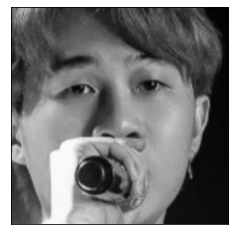

Jack


In [29]:
plt.imshow(x_train[100], cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(y_train[100])

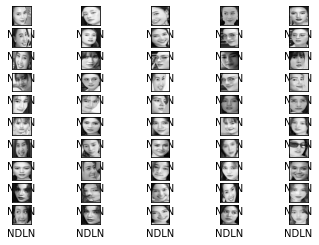

In [38]:
%matplotlib inline

fea, ax = plt.subplots(10,5)
for i,axi in enumerate(ax.flat):
  axi.imshow(x_train[i],cmap = 'gray')
  axi.set(xticks = [],yticks= [],xlabel = y_train[i])

In [42]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components = 150, whiten = True, random_state = 0)
svc = SVC(kernel = 'rbf', class_weight = 'balanced')
pipeline = make_pipeline(pca,svc)

In [43]:
pipeline

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=150,
                     random_state=0, svd_solver='auto', tol=0.0, whiten=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [50]:

from sklearn.model_selection import learning_curve, GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(pipeline, param_grid)

%time grid.fit(x_train, y_train)
print(grid.best_params_)

CPU times: user 7min 42s, sys: 1min 17s, total: 8min 59s
Wall time: 4min 34s
{'svc__C': 1, 'svc__gamma': 0.001}


In [52]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=150,
                     random_state=0, svd_solver='auto', tol=0.0, whiten=True)),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.001,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [53]:
model = grid.best_estimator_.predict(x_test)

In [54]:
model

array(['NDLN', 'NDLN', 'Jack', 'Jack', 'Jack', 'Jack', 'Jack', 'Jack',
       'Jack', 'Jack', 'Jack', 'Jack', 'Jack', 'Jack', 'Jack', 'NDLN',
       'Jack', 'Jack', 'Jack', 'Jack', 'NDLN', 'Jack', 'NDLN', 'NDLN',
       'NDLN', 'NDLN', 'MTP', 'MTP', 'MTP', 'NDLN', 'NDLN', 'NDLN',
       'NDLN', 'NDLN', 'NDLN', 'NDLN', 'NDLN', 'NDLN', 'NDLN', 'MTP',
       'NDLN', 'MTP', 'MTP', 'Jack', 'MTP', 'Jack', 'MTP', 'MTP', 'MTP',
       'Jack', 'MTP', 'MTP', 'NDLN', 'MTP', 'Jack', 'MTP', 'Jack', 'MTP',
       'MTP', 'MTP'], dtype='<U4')

In [60]:
%matplotlib inline
x_test = np.reshape(x_test.shape[0],216,216)
fea, ax = plt.subplots(3,5)
for i,axi in enumerate(ax.flat):
  axi.imshow(x_test[i],cmap='gray')
  axi.set(xticks = [],ytick=[],ylabel=y_test[i])

ValueError: ignored

In [63]:
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(accuracy_score(y_test,model))

0.75


In [62]:
print(classification_report(y_test,model))

              precision    recall  f1-score   support

        Jack       0.74      0.85      0.79        20
         MTP       0.76      0.65      0.70        20
        NDLN       0.75      0.75      0.75        20

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



In [64]:
print(confusion_matrix(y_test,model))

[[17  0  3]
 [ 5 13  2]
 [ 1  4 15]]
